In [ ]:
%%writefile Prueba1.cpp

// Comentario
/* Comentario - forma alternativa */

#include <iostream>             /* Directivas de compilación (instrucciones para traducir el código); son librerías */
#include <cmath>                /* Librerías */
using namespace std;            /* Las librerías tienen diferentes versiones, denominadas 'espacios de nombres' o 'namespace'.
                                   Aquí estamos seleccionando el namespace estándar */

int main(){                     /* Indica que lo que hay dentro de los corchetes es el programa principal.
                                   Es una sola instrucción, que puede estar compuesta de muchas instrucciones
                                   (similar a la identación). */
    cout<<"Hola, mundo"<<endl;  /* 'endl' indica un retorno, o un cambio de la línea de código o instrucción (?) */

    return 0;                   /* Las instrucciones (que se ejecutan) siempre terminan con ';'.
                                   Esto también le indica al código hasta dónde llega la línea de ejecución.
                                   En particular, la instrucción 'return 0' indica si el código se está ejecutando
                                   correctamente */
}

Writing Prueba1.cpp


A diferencia de Python, que es un lenguaje interpretado, C++ es un lenguaje compilado. Python lee el código, lo interpreta directamente y lo ejecuta; en cambio, en C++, se guarda primero el código, luego se compila y finalmente se ejecuta. \\
La compilación es una especie de traducción, la cual permite a la máquina leer el código.

In [ ]:
!g++ Prueba1.cpp && ./a.out      /* a.out es el ejecutable del código 'Prueba1.cpp' */

Hola, mundo


En C++, es obligatorio indicar siempre el tipo de variable que se piensa manejar (int, float, double, etc). Además, para trabajar con funciones también es obligatorio indicar de qué tipo es el resultado de la función. \\
La variable 'double' se comporta igual que la variable 'float', sin embargo, contiene un mayor número de decimales o cifras significativas. Tiene una mayor precisión que 'float'.

In [ ]:
%%writefile Prueba2.cpp

#include <iostream>
#include <cmath>
using namespace std;

double f(double x){
  return sin(x)/x;
}

int main(){
  float x;        /* Declarar la variable 'x' */
  for(x=0.1 /* Indico desde dónde inicia mi variable x */;x<10 /* Indico hasta dónde va mi variable x. En general, indica una CONDICIÓN */;x+=0.1 /* Indico el tamaño del paso. Esta instrucción se ejecuta luego de que se ejecute la instrucción regida por la CONDICIÓN */)
    cout<<x<<" "<<f(x)<<endl;  /* Esta instrucción se ejecuta siempre y cuando la CONDICIÓN se cumpla. Si la condición implica varias instrucciones, se colocan entre corchetes ('for(){Instrucciones}') */

  return 0;
}

Writing Prueba2.cpp


In [ ]:
!g++ Prueba2.cpp && ./a.out > datos.dat  /* Estoy redireccionando los datos a un archivo .dat */

Para graficar los datos del archivo .dat, puedo hacer un programa en Python:

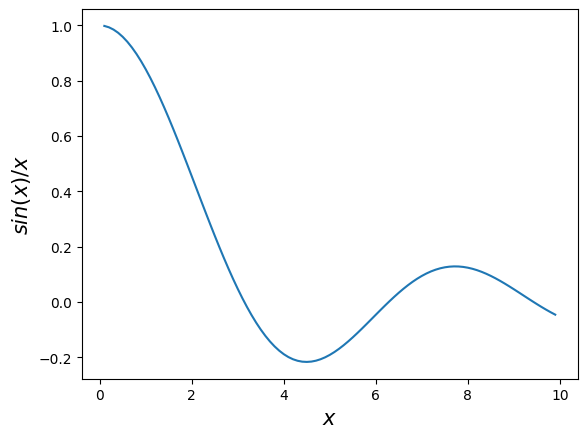

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sci

Nsteps=99 # Indica el indice del último elemento (datos.dat tiene 100 datos)

xdata=np.zeros(Nsteps)
ydata=np.zeros(Nsteps)

f = open('datos.dat', 'r')
i=0
for line in f:
    line = line.strip()
    columns = line.split()
    xdata[i] = float(columns[0])
    ydata[i] = float(columns[1])
    i+=1
f.close()


plt.plot(xdata,ydata)
plt.xlabel("$x$",size=15)
plt.ylabel("$sin(x)/x$",size=15)
plt.show()

In [ ]:
%%writefile Bisección.cpp

#include <iostream>
#include <cmath>
using namespace std;

double f(double x){
  return sin(x)/x;
}

const double ERR=1e-6;

int main(){
  float a=2,b=4,m,fa,fm;

  fa=f(a);
  while(b-a>ERR){
    m=(b+a)/2;
    fm=f(m);
    if(fa*fm>0){
      a=m;
      fa=fm;
    }
    else
      b=m;
  }
  cout<<"El cero es x="<<(a+b)/2<<endl;
  return 0;
}

Writing Bisección.cpp


In [ ]:
!g++ Bisección.cpp && ./a.out

El cero es x=3.14159


Podemos crear una función que directamente nos calcule el cero por bisección en un intervalo (a,b) cualquiera:

In [ ]:
%%writefile CeroPorBisección.cpp

#include <iostream>
#include <cmath>
using namespace std;

double f(double x){
  return sin(x)/x;
}

const double ERR=1e-6;

double CeroPorBisección(float a, float b){
  float m,fa,fm;
  fa=f(a);
  while(b-a>ERR){
    m=(b+a)/2;
    fm=f(m);
    if(fa*fm>0){
      a=m;
      fa=fm;
    }
    else
      b=m;
  }
  return (a+b)/2;
}

int main(){
  float a=2,b=4;
  cout<<"El cero es x="<<CeroPorBisección(a,b)<<endl;
  return 0;
}


Writing CeroPorBisección.cpp


In [ ]:
!g++ CeroPorBisección.cpp && ./a.out

El cero es x=3.14159
